<a href="https://colab.research.google.com/github/bharathvariar/FoDS/blob/main/1B_Polynomial_Regression_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polynomial Regression and Regularization
Bharath Variar, 2019B5A70930H <br>
Kanika Gandhi, 2019B5A71080H <br>
Karan Moza, 2019B4A71372H 

## Importing Libraries

In [36]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

## Defining Functions

In [37]:
def pol_feat(mat,deg):
    if(deg == 1):
        mat = mat.to_numpy()
        m, n = mat.shape
        return mat.reshape(n, m), n
    
    for i in range(0,deg+1):
        mat = pd.concat([mat,pd.DataFrame(mat['MLOGP']**(deg-i)*mat['RDCHI']**i)],axis=1)
    
    if (deg > 1):
        return pol_feat(mat,deg-1)     

In [38]:
def initialize(dim):
    b=random.random()
    theta=np.random.rand(1, dim)*0.01
    return b,theta

In [39]:
def r_cost(y,t,theta,l,q):
    return 0.5*np.sum(np.power((t-y),2))/y.shape[1] + (l/2)*np.sum(np.power(abs(theta),q))

### Defining Gradient Descent

In [40]:
def r_gradient_descent(num_epochs, X, t, theta, bias, learning_rate, q, l):
    # forward-propagation
    costs = []
    for iter in range(num_epochs):
        y = np.dot(theta, X) + bias
        
        loss = r_cost(y, t, theta, l, q)
        costs.append(loss)
        
        #back propagation
        r_dW = (1/y.shape[1]) * np.dot(y - t, X.T) + q*(l/2)*np.power(theta, q-1)
        dBias = (1/y.shape[1]) * np.sum((y-t))
        
        #updation
        theta = theta - learning_rate*r_dW
        bias = bias - learning_rate*dBias
       
    return costs

In [41]:
def r1_gradient_descent(num_epochs, X, t, theta, bias, learning_rate, q, l):
    
    #forward-prop
    costs = []
    der = np.array([0,0])
    for iter in range(num_epochs):
        y = np.dot(theta, X) + bias
        
        loss = r_cost(y, t, theta, l, q)
        costs.append(loss)
        
        #backprop
        if q == 0.5:
            r_dW = (1/y.shape[1]) * np.dot(y - t, X.T) + q*(l/2)*np.power(abs(theta), q-1)
        else:
            if abs(theta[0][0]) == theta[0][0] :
                der[0] = 1
            else :
                der[0] = -1
            if abs(theta[0][1]) == theta[0][1] :
                der[1] = 1
            else :
                der[1] = -1
            r_dW = (1/y.shape[1]) * np.dot(y - t, X.T) + (l/2)*der

        dBias = (1/y.shape[1]) * np.sum((y-t))
        
        #updation
        theta = theta - learning_rate*r_dW
        bias = bias - learning_rate*dBias
       
    return costs

In [42]:
def testing(X, t, theta, bias, learning_rate, q, l):
    y = np.dot(theta, X) + bias
    error = r_cost(y, t, theta, l, q)
    return error

## Dataset handling

In [43]:
df = pd.read_csv("fods_1.csv")
df.head()

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


In [44]:
# Shuffling the dataset
shuffled_df = df.sample(frac=1,random_state=100)

# Define a size for your train set 
training_data_size = int(0.8 * len(df))

# Split your dataset 
training_data = shuffled_df[:training_data_size]
testing_data = shuffled_df[training_data_size:]

### Splitting data into training and testing subsets

In [45]:
X_train = training_data[['MLOGP','RDCHI']]
y_train = training_data['quantitative response of LC50']
X_test = testing_data[['MLOGP','RDCHI']]
y_test = testing_data['quantitative response of LC50']

Polynomial of the form:
$$ y = w_0 + w_1.x + w_2.x^2 +\dots+ w_9.x^9 $$

In [46]:
data, num_features = pol_feat(X_train,1)
test_data, num_features = pol_feat(X_test,1)

In [47]:
# normalizing training data
mean = np.mean(data, axis = 1, keepdims = True)
std = np.std(data, axis = 1, keepdims = True)
data = (data - mean) / std

In [48]:
# normalizing testing data
test_data = (test_data - mean) / std

In [49]:
data.shape, num_features

((2, 436), 2)

In [50]:
b, theta=initialize(num_features)
print(b, " ", theta, theta.shape)

0.772342081932618   [[0.00780378 0.00837476]] (1, 2)


## Implementation

### For q = 0.5, 
`learning_rate` = 0.1, 
`l` = $1.0 \times 10^{-4}$

training error = 1.428


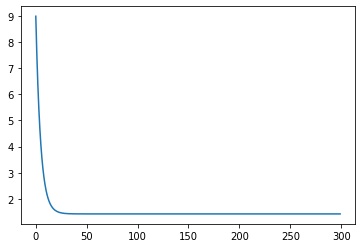

In [51]:
costs = r1_gradient_descent(300,data,y_train.to_numpy().reshape(1,-1),theta,b,0.1,0.5,1.0e-4)
print(f'training error = {costs[-1]:0.3f}')
plt.plot(costs)

In [52]:
test_error = testing(test_data,y_test.to_numpy().reshape(1,-1),theta,b,0.1,0.5,1.0e-4)
print(f'Test error = {test_error:.3f}')

Test error = 8.739


### For q = 1, 
`learning_rate` = 0.1, 
`l` = $1.0 \times 10^{-4}$

training error = 1.428


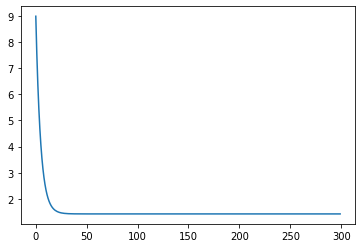

In [53]:
costs = r1_gradient_descent(300,data,y_train.to_numpy().reshape(1,-1),theta,b,0.1,1,1.0e-4)
print(f'training error = {costs[-1]:0.3f}')
plt.plot(costs)

In [54]:
test_error = testing(test_data,y_test.to_numpy().reshape(1,-1),theta,b,0.1,1,1.0e-4)
print(f'Test error = {test_error:.3f}')

Test error = 8.739


### For q = 2, 
`learning_rate` = 0.1, 
`l` = $1.0 \times 10^{-4}$

training error = 1.428


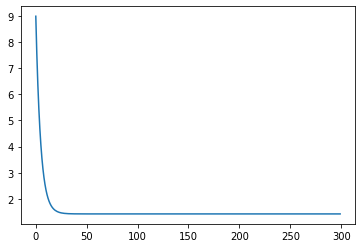

In [55]:
costs = r_gradient_descent(300,data,y_train.to_numpy().reshape(1,-1),theta,b,0.1,2,1.0e-4)
print(f'training error = {costs[-1]:0.3f}')
plt.plot(costs)

In [56]:
test_error = testing(test_data,y_test.to_numpy().reshape(1,-1),theta,b,0.1,2,1.0e-4)
print(f'Test error = {test_error:.3f}')

Test error = 8.739


### For q = 4, 
`learning_rate` = 0.1, 
`l` = $1.0 \times 10^{-4}$

training error = 1.428


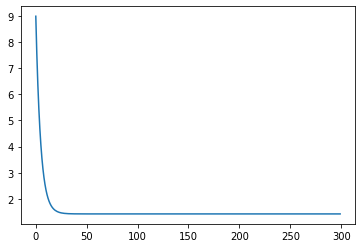

In [57]:
costs = r_gradient_descent(300,data,y_train.to_numpy().reshape(1,-1),theta,b,0.1,4,1.0e-4)
print(f'training error = {costs[-1]:0.3f}')
plt.plot(costs)

In [58]:
test_error = testing(test_data,y_test.to_numpy().reshape(1,-1),theta,b,0.1,4,1.0e-4)
print(f'Test error = {test_error:.3f}')

Test error = 8.739
